In [1]:
import torch
import torchinfo
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from labels import labels

In [3]:
weights_enum = torchvision.models.get_model_weights("vit_b_16")

In [4]:
[weights for weights in weights_enum]

[ViT_B_16_Weights.IMAGENET1K_V1,
 ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1,
 ViT_B_16_Weights.IMAGENET1K_SWAG_LINEAR_V1]

In [5]:
model = torchvision.models.vit_b_16(weights=torchvision.models.ViT_B_16_Weights)

/home/fuji/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
torchinfo.summary(model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [7]:
embedder = model.conv_proj
embedder

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [8]:
random_image = torch.randint(low=0, high=256, size=(256, 256, 3))

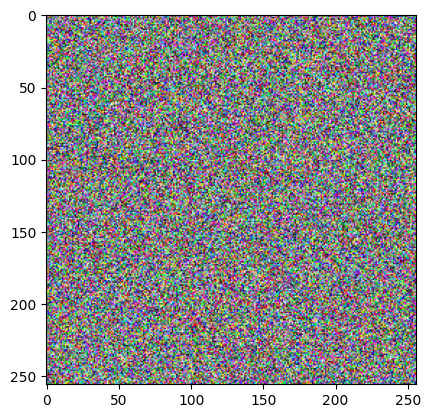

In [9]:
img = plt.imshow(random_image)

In [10]:
img_tensor = random_image.type(torch.float).permute(2, 0, 1)
img_tensor.size()

torch.Size([3, 256, 256])

In [11]:
embedding = embedder(img_tensor)
print(embedding.size())

torch.Size([768, 16, 16])


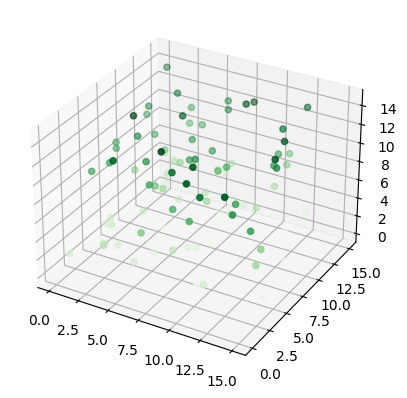

In [12]:
ax = plt.axes(projection='3d')
zdata = 15*(np.random.random(100))
xdata = 15*(np.random.random(100))
ydata = 15*(np.random.random(100))
ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap='Greens')

In [13]:
from PIL import Image

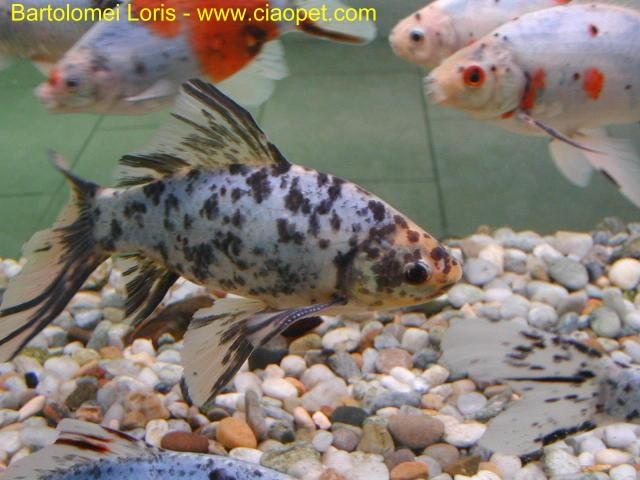

In [14]:
img = Image.open('./n01443537_10007.jpeg')
img

In [15]:
from torchvision import transforms

In [16]:
preprocess = transforms.Compose([
  transforms.Resize((224, 224)),
  transforms.ToTensor()
])

In [17]:
img_tensor = preprocess(img)

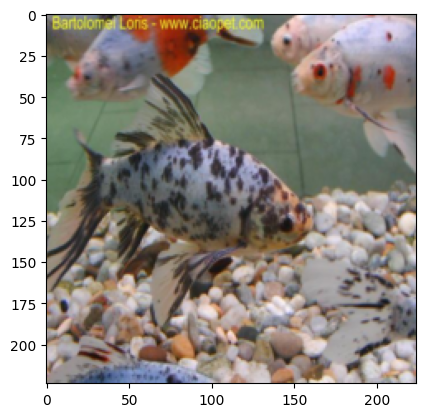

In [18]:
plt.imshow(img_tensor.permute(1, 2, 0))

In [19]:
embedding = embedder(img_tensor)

In [20]:
embedding.size()

torch.Size([768, 14, 14])

In [21]:
output = model(torch.unsqueeze(img_tensor, dim=0))
output

tensor([[ 2.8666e+00,  7.3138e+00, -6.3907e-01, -4.5181e-01, -1.6897e-01,
          2.9617e-01, -5.0796e-01, -1.4892e-01,  5.2320e-01,  1.5951e+00,
         -1.2899e+00, -7.8122e-01, -9.8243e-01, -4.6318e-01, -3.5946e-01,
         -3.9145e-01, -7.4377e-01,  1.0244e-01, -6.3266e-02, -5.5407e-01,
          1.0277e+00,  6.6175e-02, -8.5211e-01,  7.0386e-01,  4.1559e-01,
         -3.8421e-01, -5.0218e-01, -8.1190e-01, -1.3437e+00,  5.0091e-04,
         -1.4581e-01, -2.0549e+00, -3.2583e-01,  5.8317e-02,  4.0756e-01,
          1.2128e+00,  1.7182e+00,  5.2283e-01,  4.6512e-01,  2.6749e-01,
         -1.6329e+00,  7.7753e-01,  9.4072e-01, -1.6327e-01, -3.8609e-01,
          1.8596e-01, -1.2792e+00,  2.8008e-01,  9.5719e-01, -2.2104e-01,
          4.3078e-01, -7.4787e-01, -1.8199e-01,  1.0445e+00,  6.7150e-01,
         -1.3589e+00,  4.9325e-01,  2.4705e-01,  1.2897e+00, -2.4986e+00,
         -9.5071e-01, -5.4858e-02,  2.7134e-01,  1.0395e+00, -7.2206e-01,
         -1.4939e+00,  8.9264e-01,  3.

In [22]:
output.size()

torch.Size([1, 1000])

In [24]:
labels[torch.softmax(output, dim=1).argmax(dim=1)]

'goldfish, Carassius auratus'

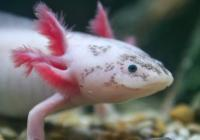

In [26]:
img = Image.open('./n01632777_10442.JPEG')
img

In [27]:
img_tensor = preprocess(img)
output = model(torch.unsqueeze(img_tensor, dim=0)).softmax(dim=1).argmax(dim=1)
labels[output]

'axolotl, mud puppy, Ambystoma mexicanum'